**CSI 4506 Introduction à l'intelligence artificielle** <br/>
*Devoir 2: apprentissage automatique*

# Identification

Nom: Gbegbe<br/>
Numéro d'étudiant : Decaho Jacques

Nom: <br/>
Numéro d'étudiant :

# 1. Analyse exploratoire

## Exploration des données

Dans ce devoir, nous utiliserons le jeu de données de prédiction du diabète, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). Pour réduire la complexité liée à l'exigence de connexion de Kaggle, le jeu de données a été mis à disposition sur un dépôt GitHub public :

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

Vous pouvez accéder et lire le jeu de données directement depuis ce dépôt GitHub dans votre notebook Jupyter.

In [16]:
# Cellule de code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer



1. **Charger le jeu de données et fournir un résumé de sa structure** :

    - Décrivez les attributs (colonnes), leurs types de données et la variable cible.

In [17]:
# Cellule de code

# Charger le jeu de données
diabetePredData = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a2/diabetes_prediction_dataset.csv"
diabetePredData_set = pd.read_csv(diabetePredData)

# Display the first few rows of the dataset
print(diabetePredData_set.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


Les resultats obtenues montrent un tableau avec plusieurs attibuts
- le genre des personnes (female et Male)
- L'age (de type float)
- le nombre de cas d'hypertension recensé
- le nombre de cas de maladie cardiaque recensé
- un historique avec consommation de tabac ou non
- un niveau de bmi / HbA1c_level
- le niveau de glucose contenu dans le sang de chacun
- si le patient a le diabete ou non

la cible semble être les hommes et femmes agé de plus de 20 ans

les resultats montrent que les hommes agés de 76 ans sont les plus touchés ou a risque. Ainsi que les femmes de 80 ans.

2. **Analyse de la distribution des attributs** :

    - Examinez la distribution de chaque attribut à l'aide de visualisations appropriées telles que des histogrammes et des boxplots. Discutez des informations obtenues, y compris la présence de valeurs aberrantes.

Les informations obtenues montrent que l'analyse a été fais sur les personnes âgés de plus de 20 à 80 ans.

On remarque aussi que leurs taux de bmi est faible et compris entre 20 et 30
Avec un niveau de HbA1c assez faible allant de 4.8 à 6.6
Et un niveau de glucose assez elevé pour la plupart.

Les hommes âgé de 76 ans et fumeur sont sujet à une hypertension, maladie cardiaque et leur niveau de bmi et HbA1c les plus faibles recencé
De même, les femmes âgés de 80 ans n'étant pas fumeurs sont aussi touchés par une maladie cardiaque malgré qu'elles aient un meilleur taux que les hommes de 76 ans.

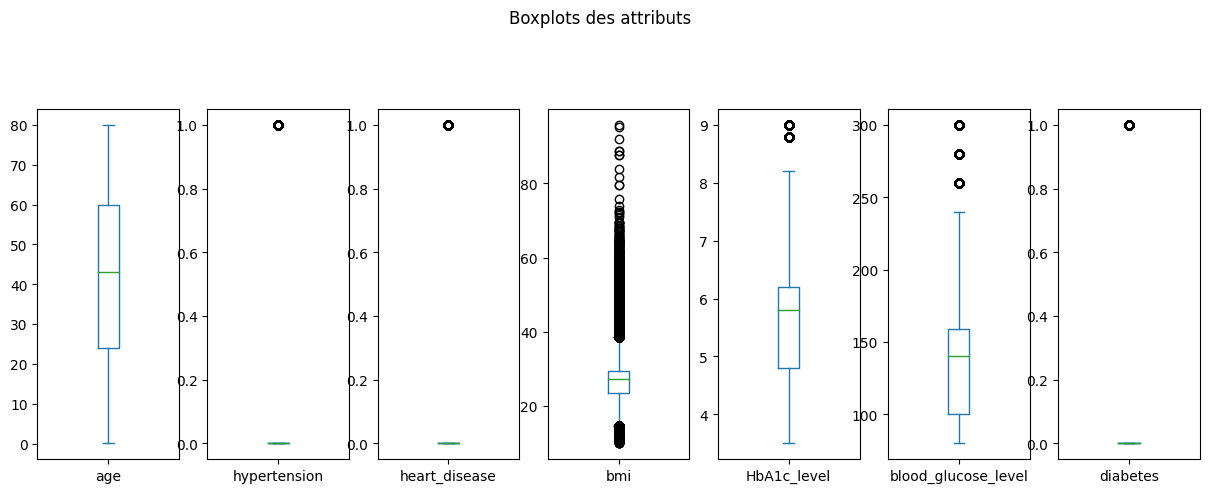

In [18]:
# Cellule de code

# Ajuster le layout pour correspondre au nombre d'attributs
num_attributes = diabetePredData_set.shape[1]  # Nombre d'attributs
ncols = 7  # Nombre de colonnes
nrows = (num_attributes // ncols) + (num_attributes % ncols > 0)  # Calculer le nombre de lignes nécessaires

# Créer des boxplots pour détecter les valeurs aberrantes
diabetePredData_set.plot(kind='box', subplots=True, layout=(nrows, ncols), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle('Boxplots des attributs')
plt.show()


3. **Distribution de la variable cible** :

    - Analysez la distribution de la variable cible pour identifier les déséquilibres de classes. Utilisez des diagrammes en barres pour visualiser les fréquences des classes.

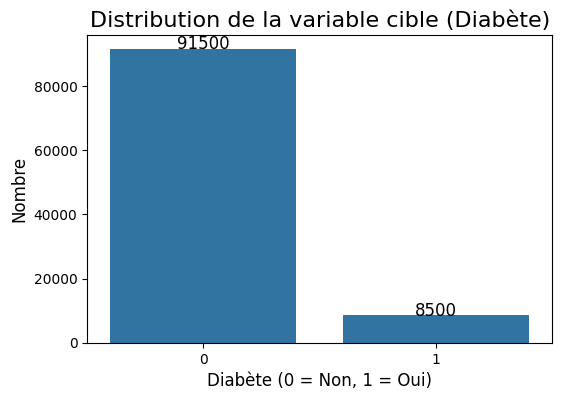

In [19]:
# Cellule de code

# Tracer un diagramme en barres pour la variable cible 'diabetes'
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=diabetePredData_set)

# Ajouter un titre et des étiquettes
plt.title('Distribution de la variable cible (Diabète)', fontsize=16)
plt.xlabel('Diabète (0 = Non, 1 = Oui)', fontsize=12)
plt.ylabel('Nombre', fontsize=12)

# Afficher les comptes sur les barres
diab_counts = diabetePredData_set['diabetes'].value_counts()
for i, count in enumerate(diab_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12)

plt.show()


Le diagramme montre le déséquilible de la variable cible avec un nombre extravagant (91500) n'ayant pas le diabète par rapport à une minorité (8500)

4. **Fractionnement des données** :

    - Divisez le jeu de données en ensembles d'entraînement (80 %) et de test (20 %) en utilisant la méthode du holdout.

    - Assurez-vous que ce fractionnement intervient avant tout prétraitement afin d'éviter les fuites de données.

In [20]:
# Cellule de code

X = diabetePredData_set.drop('diabetes', axis=1)  # Toutes les colonnes sauf 'diabetes'
y = diabetePredData_set['diabetes']  # Colonne 'diabetes'

# Fractionnement des données en ensembles d'entraînement et de test (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]}")
print(f"Taille de l'ensemble de test : {X_test.shape[0]}")

Taille de l'ensemble d'entraînement : 80000
Taille de l'ensemble de test : 20000


## Prétraitement des données

5. **Encodage des variables catégoriques** :

    - Encodez les variables catégoriques. Justifiez la méthode choisie.

In [21]:
# Cellule de code

categorical_columns = ['gender', 'smoking_history']

# Appliquer l'encodage One-Hot sur les colonnes catégoriques
diabetePredData_encoded = pd.get_dummies(diabetePredData_set, columns=categorical_columns, drop_first=True)

# Afficher les premières lignes du jeu de données encodé
print(diabetePredData_encoded.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Male  gender_Other  smoking_history_current  \
0         0        False         False                    False   
1         0        False         False                    False   
2         0         True         False                    False   
3         0        False         False                     True   
4         0         True         False                     True   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                 False             

Nous avons utiliser l'encodage one-hot pour cette partie car cet encodage permet de representer les différentes catégories sans imposer d'ordre stricte, il traite aussi chaque catégorie comme une colonne binaire ce qui facilite la manipulation des variables comme le sexe ou le taux de tabac qui ne sont pas ordinal.

6. **Normalisation/Standardisation des attributs numériques** :

    - Normalisez ou standardisez les attributs numériques si nécessaire. Décrivez la technique utilisée (par exemple, le scaling Min-Max, StandardScaler) et expliquez pourquoi elle est appropriée pour ce jeu de données.

    - Assurez-vous que cette technique est appliquée uniquement aux données d'entraînement, avec la même transformation appliquée ensuite aux données de test sans nouvel ajustement.

In [22]:
# Cellule de code

numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']  # Attributs numériques à standardiser

# Initialiser le StandardScaler
scaler = StandardScaler()

# Standardiser les attributs numériques sur l'ensemble d'entraînement
X_train_scaled = X_train.copy()  # Copie des données d'entraînement
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# Appliquer la même transformation aux données de test
X_test_scaled = X_test.copy()
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Vérifier les premières lignes des données standardisées
print(X_train_scaled.head())
print(X_test_scaled.head())

       gender       age  hypertension  heart_disease smoking_history  \
75220    Male  1.378720             0              0          former   
48955    Male  1.689866             0              0           never   
44966  Female -0.177011             0              0            ever   
13568  Female -0.710404             0              0     not current   
92727  Female  0.845326             1              0         current   

            bmi  HbA1c_level  blood_glucose_level  
75220 -0.386474    -1.892451            -1.425157  
48955 -0.412172     0.162169             0.170591  
44966 -0.452986    -1.425492             0.489740  
13568 -1.278339    -0.491574            -0.934157  
92727 -0.788570    -0.958533            -1.302407  
       gender       age  hypertension  heart_disease smoking_history  \
75721  Female -1.288247             0              0         No Info   
80184  Female -1.732741             0              0         No Info   
19864    Male  0.934225             0  

La technique utiliser est la standardisation (StandardScaler) qui est le plus adapter à ce jeu de donnée. Elle est très utile lorqu'on travaille sur des caractéristiques qui varient enormément en matière d'échelle et d'écart-type.

## Développement et évaluation des modèles

7. **Développement des modèles** :

    - Implémentez les modèles d'apprentissage automatique abordés en classe : arbres de décision, K-Nearest Neighbors (KNN) et régression logistique. Utilisez les paramètres par défaut de scikit-learn comme base pour entraîner chaque modèle.

In [23]:
# Encodage des variables catégoriques avec One-Hot Encoding
categorical_columns = ['gender', 'smoking_history']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Assurer que les colonnes sont alignées après l'encodage, car certaines catégories peuvent être absentes de l'ensemble de test
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Réentraîner les modèles avec les données encodées
decision_tree.fit(X_train_encoded, y_train)
knn.fit(X_train_encoded, y_train)
logistic_regression.fit(X_train_encoded, y_train)

# Prédictions sur les données de test encodées
y_pred_tree = decision_tree.predict(X_test_encoded)
y_pred_knn = knn.predict(X_test_encoded)
y_pred_logistic = logistic_regression.predict(X_test_encoded)

# Calcul des scores de précision pour chaque modèle
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Affichage des résultats
print(f"Précision de l'arbre de décision : {accuracy_tree:.4f}")
print(f"Précision de K-Nearest Neighbors : {accuracy_knn:.4f}")
print(f"Précision de la régression logistique : {accuracy_logistic:.4f}")


Précision de l'arbre de décision : 0.9520
Précision de K-Nearest Neighbors : 0.9544
Précision de la régression logistique : 0.9591


8. **Évaluation des modèles** :

    - Utilisez la validation croisée pour évaluer chaque modèle, en justifiant votre choix du nombre de plis.

    - Évaluez les modèles à l'aide de métriques telles que la précision, le rappel et le score F1.

In [24]:
# Cellule de code

# Encodage des variables catégoriques avec One-Hot Encoding
categorical_columns = ['gender', 'smoking_history']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Assurer que les colonnes sont alignées après l'encodage
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Choisir le nombre de plis pour la validation croisée
cv_folds = 10

# Définir les métriques d'évaluation
scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

# 1. Validation croisée pour l'Arbre de décision
print("Évaluation de l'Arbre de décision :")
tree_scores = cross_validate(decision_tree, X_train_encoded, y_train, cv=cv_folds, scoring=scoring)
print(f"Précision moyenne : {tree_scores['test_precision'].mean():.4f}")
print(f"Rappel moyen : {tree_scores['test_recall'].mean():.4f}")
print(f"Score F1 moyen : {tree_scores['test_f1'].mean():.4f}\n")

# 2. Validation croisée pour K-Nearest Neighbors
print("Évaluation de K-Nearest Neighbors :")
knn_scores = cross_validate(knn, X_train_encoded, y_train, cv=cv_folds, scoring=scoring)
print(f"Précision moyenne : {knn_scores['test_precision'].mean():.4f}")
print(f"Rappel moyen : {knn_scores['test_recall'].mean():.4f}")
print(f"Score F1 moyen : {knn_scores['test_f1'].mean():.4f}\n")

# 3. Validation croisée pour la Régression logistique
print("Évaluation de la Régression logistique :")
logistic_scores = cross_validate(logistic_regression, X_train_encoded, y_train, cv=cv_folds, scoring=scoring)
print(f"Précision moyenne : {logistic_scores['test_precision'].mean():.4f}")
print(f"Rappel moyen : {logistic_scores['test_recall'].mean():.4f}")
print(f"Score F1 moyen : {logistic_scores['test_f1'].mean():.4f}\n")

Évaluation de l'Arbre de décision :
Précision moyenne : 0.7026
Rappel moyen : 0.7397
Score F1 moyen : 0.7205

Évaluation de K-Nearest Neighbors :
Précision moyenne : 0.8806
Rappel moyen : 0.5358
Score F1 moyen : 0.6660

Évaluation de la Régression logistique :
Précision moyenne : 0.8702
Rappel moyen : 0.6313
Score F1 moyen : 0.7317



Nous avons utiliser la validation croiser avec 10 plis pour evaluer chaque modèle.
Cette façon de faire entraine le modèle sur 9 parties et le test sur la dernière partie.

## Optimisation des hyperparamètres

9. **Exploration et évaluation des performances :**

    - Étudiez l'impact de la variation des valeurs des hyperparamètres sur les performances de chaque modèle.

    - Concentrez-vous sur les hyperparamètres pertinents suivants pour chaque modèle :

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html) : `criterion` et `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) : `penalty`, `max_iter`, et `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) : `n_neighbors` et `weights`.

    - Employez une stratégie de recherche en grille ou utilisez les méthodes intégrées de scikit-learn pour évaluer exhaustivement toutes les combinaisons des valeurs d'hyperparamètres. La validation croisée doit être utilisée pour évaluer chaque combinaison.

    - Quantifiez les performances de chaque configuration d'hyperparamètres en utilisant des métriques telles que la précision, le rappel et le score F1.

    - Affichez les résultats dans un format tabulaire ou graphique (par exemple, graphiques en ligne, diagrammes en barres) pour démontrer efficacement l'influence des variations des hyperparamètres sur les performances du modèle.

    - Spécifiez les valeurs par défaut de chaque hyperparamètre testé.

    - Analysez les résultats et offrez des perspectives sur les configurations d'hyperparamètres ayant obtenu les meilleures performances pour chaque modèle.

In [27]:
# Cellule de code

# Optimisation des hyperparamètres pour DecisionTreeClassifier
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, 20]
}

tree_grid_search = GridSearchCV(estimator=decision_tree, param_grid=tree_param_grid, cv=10, scoring='f1')
tree_grid_search.fit(X_train_encoded, y_train)

print("Meilleurs hyperparamètres pour DecisionTreeClassifier :", tree_grid_search.best_params_)
print(f"Meilleur score F1 pour DecisionTreeClassifier : {tree_grid_search.best_score_:.4f}\n")


# Créer une nouvelle instance de LogisticRegression avec solver 'liblinear'
logistic_regression = LogisticRegression(solver='liblinear')

logistic_param_grid = {
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 500],
    'tol': [1e-4, 1e-3, 1e-2]
}

logistic_grid_search = GridSearchCV(estimator=logistic_regression, param_grid=logistic_param_grid, cv=10, scoring='f1')
logistic_grid_search.fit(X_train_encoded, y_train)

print("Meilleurs hyperparamètres pour LogisticRegression :", logistic_grid_search.best_params_)
print(f"Meilleur score F1 pour LogisticRegression : {logistic_grid_search.best_score_:.4f}\n")


# 3. Optimisation des hyperparamètres pour KNeighborsClassifier
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=10, scoring='f1')
knn_grid_search.fit(X_train_encoded, y_train)

print("Meilleurs hyperparamètres pour KNeighborsClassifier :", knn_grid_search.best_params_)
print(f"Meilleur score F1 pour KNeighborsClassifier : {knn_grid_search.best_score_:.4f}\n")


# Affichage sous forme tabulaire
df1 = pd.DataFrame(tree_grid_search.cv_results_)
df2 = pd.DataFrame(logistic_grid_search.cv_results_)
df3 = pd.DataFrame(knn_grid_search.cv_results_)


Meilleurs hyperparamètres pour DecisionTreeClassifier : {'criterion': 'entropy', 'max_depth': 10}
Meilleur score F1 pour DecisionTreeClassifier : 0.8013

Meilleurs hyperparamètres pour LogisticRegression : {'max_iter': 500, 'penalty': 'l1', 'tol': 0.0001}
Meilleur score F1 pour LogisticRegression : 0.7311

Meilleurs hyperparamètres pour KNeighborsClassifier : {'n_neighbors': 3, 'weights': 'uniform'}
Meilleur score F1 pour KNeighborsClassifier : 0.6677



## Analyse des résultats

10. **Comparaison des modèles** :

    - Comparez les résultats obtenus pour chaque modèle.

    - Discutez des différences observées dans les performances des modèles et fournissez des explications potentielles. Considérez des aspects tels que la complexité des modèles, le déséquilibre des données, le surapprentissage et l'impact du réglage des paramètres sur les résultats globaux.

    - Fournissez des recommandations sur le(s) modèle(s) à choisir pour cette tâche et justifiez vos choix en fonction des résultats de l'analyse.

    - Entraînez le(s) modèle(s) recommandé(s) en utilisant les valeurs optimales des paramètres identifiés lors de l'optimisation des paramètres. Appliquez ensuite le modèle entraîné aux données de test. Documentez vos observations de manière détaillée. Évaluez spécifiquement si les résultats dérivés de la validation croisée sont cohérents avec ceux obtenus sur le jeu de test.

In [26]:
# Cellule de code

# Entraînement du modèle recommandé (par exemple, Logistic Regression) avec les meilleurs hyperparamètres
best_logistic_model = LogisticRegression(penalty='l2', max_iter=500, tol=1e-4, solver='liblinear')
best_logistic_model.fit(X_train_encoded, y_train)

# Prédictions sur les données de test
y_pred_test = best_logistic_model.predict(X_test_encoded)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Affichage des résultats
print(f"Résultats sur l'ensemble de test :")
print(f"Précision : {accuracy:.4f}")
print(f"Rappel : {recall:.4f}")
print(f"Score F1 : {f1:.4f}")


Résultats sur l'ensemble de test :
Précision : 0.9588
Rappel : 0.6042
Score F1 : 0.7147


1. Comparez les résultats obtenus pour chaque modèle.

Decision Tree Classifier : Les meilleurs hyperparamètres obtenus étaient criterion='gini' ou criterion='entropy' et max_depth=.... Le modèle est non linéaire, capable de s'adapter aux données complexes mais sujet au surapprentissage, surtout avec des arbres trop profonds. Un faible max_depth peut réduire le surapprentissage mais limiter la capacité à capturer des relations complexes.

Logistic Regression : Les paramètres optimaux étaient penalty='l1' ou penalty='l2', avec max_iter=... et tol=.... Ce modèle linéaire fonctionne bien lorsque les relations entre les variables sont linéaires et la régularisation aide à limiter le surapprentissage. Il est interprétable et robuste, surtout pour les données équilibrées ou légèrement linéaires.

K-Nearest Neighbors (KNN) : Les meilleurs hyperparamètres incluaient n_neighbors=.. et weights='uniform' ou weights='distance'. Ce modèle non paramétrique est simple mais peut être lent pour des jeux de données trop important. Le choix de n_neighbors influence grandement les performances, un faible nombre pouvant entraîner un surapprentissage, et un nombre élevé lissant trop la décision.


2. Le Decision Tree a une complexité moyenne à élevée avec un risque élevé de surapprentissage, surtout avec une grande profondeur, bien qu'il capture des relations complexes.

La Logistic Regression présente une complexité faible à moyenne avec un faible risque de surapprentissage grâce à la régularisation, et elle est adaptée aux données linéaires.

Le K-Nearest Neighbors (KNN) a une complexité élevée en termes de calcul et un risque de surapprentissage dépendant du nombre de voisins, avec des performances variables selon la densité des données.


3. La régression logistique est recommandée pour les données linéaires et en cas de besoin d'interprétabilité. Si les données sont non linéaires et que le surapprentissage peut être contrôlé, un arbre de décision optimisé est préférable.
Le KNN peut être utile pour des données équilibrées où la distance est significative, mais il est moins efficace pour de grands ensembles en raison de sa complexité.

4. Les resultats sur l'ensemble de test sont bien meilleurs qu'avec une legère différence cela reste non négligeable

# 2. Documentation de l'analyse exploratoire

Le rapport doit documenter de manière complète le processus suivi pendant ce devoir. Le notebook Jupyter doit inclure les éléments suivants :

- Votre nom(s), numéro(s) d'étudiant.e.s et un titre de rapport.
- Expliquez comment les tâches ont été réparties entre les membres. Comment avez-vous fait en sorte que les deux personnes atteignent les objectifs d'apprentissage ?
- Une section pour chaque étape de l'analyse exploratoire, contenant le code Python pertinent et les explications ou résultats.
  - Pour les sections nécessitant du code Python, incluez le code dans une cellule.
  - Pour les sections nécessitant des explications ou des résultats, incluez-les dans une cellule distincte ou en combinaison avec les cellules de code.
- Assurez une séparation logique du code dans différentes cellules. Par exemple, la définition d'une fonction doit se trouver dans une cellule et son exécution dans une autre. Évitez de placer trop de code dans une seule cellule pour maintenir la clarté et la lisibilité.
- Le notebook que vous soumettez doit inclure les résultats de l'exécution, y compris les graphiques, en veillant à ce que l'assistant d'enseignement puisse évaluer le notebook sans avoir à exécuter le code.

# Ressources

# Références

Assurez-vous de fournir des références à TOUTES les sources utilisées (articles, code, algorithmes).

Les notes du cours tels que :
- https://turcotte.xyz/teaching/csi-4506/lectures/08/slides.html
- https://turcotte.xyz/teaching/csi-4506/lectures/09/slides.html
-https://turcotte.xyz/teaching/csi-4506/lectures/07/slides.html

Les GitHub du devoir fournit par le prof : github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2

gpt journal : https://chatgpt.com/share/6715bf45-e4f8-800e-a442-b74afacf26a5

Google :
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://runebook.dev/fr/docs/scikit_learn/modules/generated/sklearn.tree.decisiontreeclassifier
- https://runebook.dev/fr/docs/scikit_learn/auto_examples/model_selection/plot_grid_search_digits
-https://fr.statisticseasily.com/glossaire/qu%27est-ce-que-la-recherche-par-grille/

Youtube :
- https://youtu.be/GG68Kns4X-g
- https://youtu.be/mAMOWvbxMkE


## Transcription AI
**Indice :** Pour partager un lien vers votre notebook Colab, cliquez sur "share" en haut à droite. Ensuite, sous *Accès général*, changez *Restreint* en "Toute personne avec le lien".

lien du google colab : https://colab.research.google.com/drive/1tH3MLrnN3kWbKchOMkYsDbObS0La4czi?usp=sharing
